In [4]:
# create init weights that near all points
def init_weights(x1, y1, x2, y2):
    w = (y2 - y1)/(x2 - x1)
    b = y1 - w*x1
    return w, b

# shuffle data
def shuffle_data(X, y):
    zip_data = list(zip(X, y))
    random.shuffle(zip_data)
    X_shuffled, y_shuffled = zip(*zip_data)

    return X_shuffled, y_shuffled

# forward
def predict(x, w, b):
    return x*w + b

# compute gradient
def gradient(y_hat, y, x):
    dw = 2*x*(y_hat-y)
    db = 2*(y_hat-y)
    
    return (dw, db)

# update weights
def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db
    
    return (w_new, b_new)

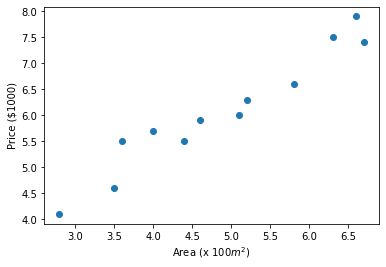

In [5]:
# plot data
import matplotlib.pyplot as plt
import random

areas  = [6.7, 4.6, 3.5, 5.1, 4.4, 4.0, 6.6, 3.6, 6.3, 5.8, 2.8, 5.2]
prices = [7.4, 5.9, 4.6, 6.0, 5.5, 5.7, 7.9, 5.5, 7.5, 6.6, 4.1, 6.3]
N = len(areas)

plt.scatter(areas, prices)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price ($1000)')
plt.show()

In [6]:
# data preparation
max_point = (max(areas), prices[areas.index(max(areas))])
min_point = (min(areas), prices[areas.index(min(areas))])

x1 = max_point[0]
y1 = max_point[1]

x2 = min_point[0]
y2 = min_point[1]

print(f'areas: {areas}')
print(f'prices: {prices}')
print(f'data_size: {N}')
print(f'max_point: x = {max_point[0]}    y = {max_point[1]}')
print(f'min_point: x = {min_point[0]}    y = {min_point[1]}')

areas: [6.7, 4.6, 3.5, 5.1, 4.4, 4.0, 6.6, 3.6, 6.3, 5.8, 2.8, 5.2]
prices: [7.4, 5.9, 4.6, 6.0, 5.5, 5.7, 7.9, 5.5, 7.5, 6.6, 4.1, 6.3]
data_size: 12
max_point: x = 6.7    y = 7.4
min_point: x = 2.8    y = 4.1


In [7]:
w,b = init_weights(x1, y1, x2, y2)

In [8]:
print(w)
print(b)

0.8461538461538463
1.73076923076923


In [16]:
# init weights
w,b = init_weights(x1, y1, x2, y2)
lr = 0.01

# parameter
epoch_max = 1
losses = [] # monitoring
parameters = [] # monitoring

for epoch in range(epoch_max):
    # shuffle data
    areas_sh, prices_sh = shuffle_data(areas, prices)
    
    # for an epoch    
    for i in range(N):
        
        # get a sample
        x = areas_sh[i]
        y = prices_sh[i]      
        
        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = (y_hat-y)**2
        
        # for debug
        losses.append(loss)

        # compute gradient
        (dw, db) = gradient(y_hat, y, x)

        # update weights
        parameters.append((w, b))
        (w, b) = update_weight(w, b, lr, dw, db)

In [17]:
# get result 
print(w, b)

0.9096590303065731 1.7459930797249443


In [18]:
for _ in losses:
    print(_)

0.07668639053254482
0.0009742081514792596
0.039444672250441244
0.3294599983996144
0.10936087226911559
0.0011645688632156545
0.015833104229166835
0.3453887168628086
0.20434082840004728
0.36845771252725834
0.08921518518267017
0.015464337455916162


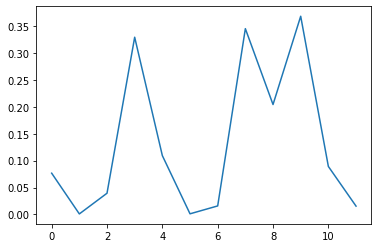

In [19]:
plt.plot(losses)
plt.show()

In [20]:
# predict for real data
area_real = 10
predicted_price = area_real*w + b
print('predicted_price: ', predicted_price)

predicted_price:  10.842583382790675


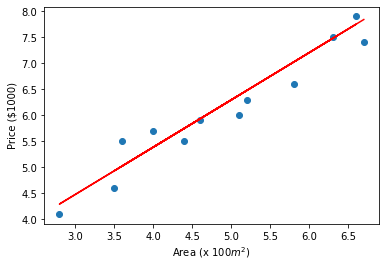

In [21]:
#plot results
prices_pred = [x*w + b for x in areas]
plt.plot(areas, prices_pred, 'r')
plt.scatter(areas, prices)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price ($1000)')
plt.show()

Lần học thứ 1, Loss = 0.07668639053254482


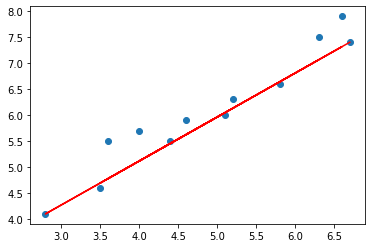

Lần học thứ 2, Loss = 0.0009742081514792596


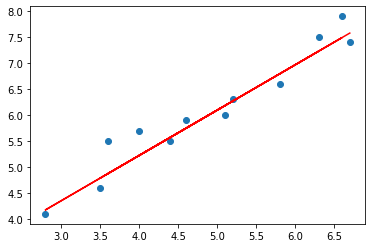

Lần học thứ 3, Loss = 0.039444672250441244


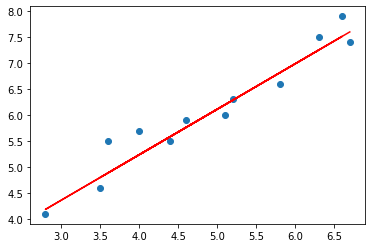

Lần học thứ 4, Loss = 0.3294599983996144


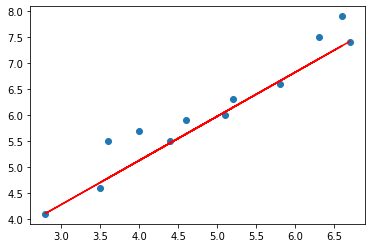

Lần học thứ 5, Loss = 0.10936087226911559


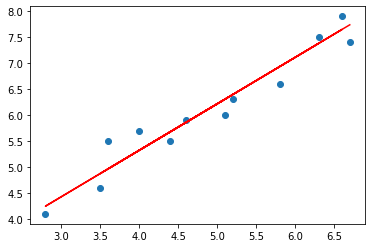

Lần học thứ 6, Loss = 0.0011645688632156545


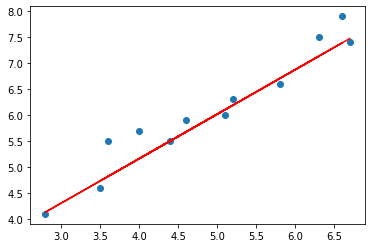

Lần học thứ 7, Loss = 0.015833104229166835


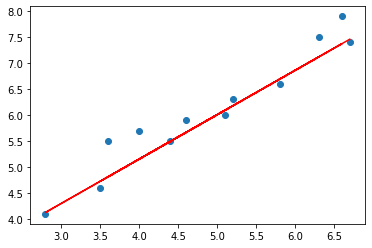

Lần học thứ 8, Loss = 0.3453887168628086


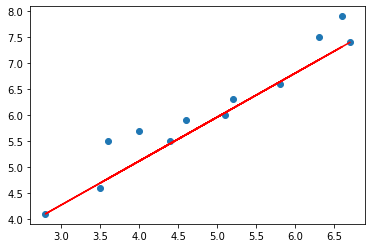

Lần học thứ 9, Loss = 0.20434082840004728


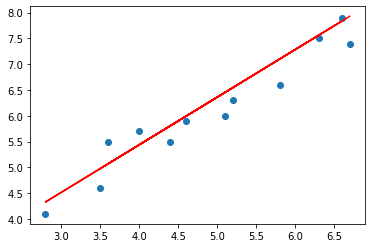

Lần học thứ 10, Loss = 0.36845771252725834


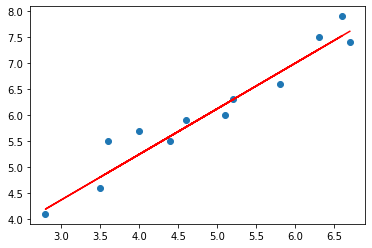

Lần học thứ 11, Loss = 0.08921518518267017


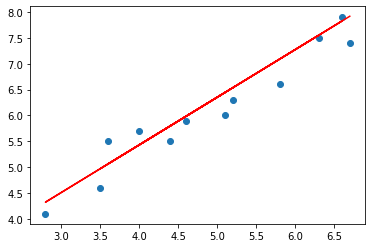

Lần học thứ 12, Loss = 0.015464337455916162


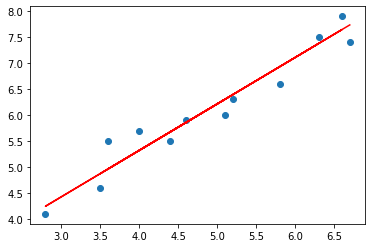

In [22]:
learn_n = 0
for _ in parameters:
    print('Lần học thứ {}, Loss = {}'.format(learn_n + 1, losses[learn_n]))
    w = _[0]
    b = _[1]
    prices_pred = [x*w + b for x in areas]
    plt.plot(areas, prices_pred, 'r')
    plt.scatter(areas, prices)
    plt.show()
    learn_n += 1